In [ ]:
# https://github.com/jukyellow/algoTrade/blob/master/ch04/4.2%20%EB%B3%BC%EB%A6%B0%EC%A0%80%EB%B0%B4%EB%93%9C%20%ED%8F%89%EA%B7%A0%ED%9A%8C%EA%B7%80.ipynb

In [4]:
import pandas as pd

df = pd.read_csv('SPY.csv')
print(df.head())
print(df.describe())

         Date      Open      High       Low     Close  Adj Close   Volume
0  1993-01-29  43.96875  43.96875  43.75000  43.93750  26.706757  1003200
1  1993-02-01  43.96875  44.25000  43.96875  44.25000  26.896694   480500
2  1993-02-02  44.21875  44.37500  44.12500  44.34375  26.953669   201300
3  1993-02-03  44.40625  44.84375  44.37500  44.81250  27.238594   529400
4  1993-02-04  44.96875  45.09375  44.46875  45.00000  27.352570   531500
              Open         High  ...    Adj Close        Volume
count  6648.000000  6648.000000  ...  6648.000000  6.648000e+03
mean    133.762935   134.541071  ...   110.399391  8.440122e+07
std      59.488006    59.671285  ...    64.113369  9.837713e+07
min      43.343750    43.531250  ...    26.383823  5.200000e+03
25%      96.780937    97.735000  ...    71.256485  6.966775e+06
50%     124.433750   125.335938  ...    93.641503  5.709990e+07
75%     151.702503   152.514999  ...   125.251474  1.229908e+08
max     296.040009   296.309998  ...   294.4

In [5]:
df['CODE'] = 'SPY'
print(df.head(3))

price_df = df.loc[:,['Date','Adj Close']].copy()
print(price_df.head(3))

         Date      Open      High       Low     Close  Adj Close   Volume CODE
0  1993-01-29  43.96875  43.96875  43.75000  43.93750  26.706757  1003200  SPY
1  1993-02-01  43.96875  44.25000  43.96875  44.25000  26.896694   480500  SPY
2  1993-02-02  44.21875  44.37500  44.12500  44.34375  26.953669   201300  SPY
         Date  Adj Close
0  1993-01-29  26.706757
1  1993-02-01  26.896694
2  1993-02-02  26.953669


In [6]:
# index 변경하고 세팅적용
price_df.set_index(['Date'],inplace=True)
price_df.head(3)

,Adj Close
Date,
1993-01-29,26.706757
1993-02-01,26.896694
1993-02-02,26.953669


In [7]:
price_df['center'] = price_df['Adj Close'].rolling(20).mean() # 이동평균선을 구한다.
price_df.iloc[18:25]

,Adj Close,center
Date,,
1993-02-25,26.953669,NaN
1993-02-26,26.991682,26.910942
1993-03-01,26.915695,26.921389
1993-03-02,27.314577,26.942283
1993-03-03,27.428545,26.966027
1993-03-04,27.276592,26.967927
1993-03-05,27.200619,26.960329


In [9]:
# +2 표준편차를 둔 상단 밴드를 구한다.
price_df['ub'] = price_df['center'] + 2 * price_df['Adj Close'].rolling(20).std()
print(price_df.iloc[18:25])

# -2 표준편차를 둔 하단 밴드를 구한다.
price_df['lb'] = price_df['center'] - 2 * price_df['Adj Close'].rolling(20).std()
print(price_df.iloc[18:25])

            Adj Close     center         ub
Date                                       
1993-02-25  26.953669        NaN        NaN
1993-02-26  26.991682  26.910942  27.598068
1993-03-01  26.915695  26.921389  27.601764
1993-03-02  27.314577  26.942283  27.644772
1993-03-03  27.428545  26.966027  27.701465
1993-03-04  27.276592  26.967927  27.706519
1993-03-05  27.200619  26.960329  27.685261
            Adj Close     center         ub         lb
Date                                                  
1993-02-25  26.953669        NaN        NaN        NaN
1993-02-26  26.991682  26.910942  27.598068  26.223816
1993-03-01  26.915695  26.921389  27.601764  26.241013
1993-03-02  27.314577  26.942283  27.644772  26.239794
1993-03-03  27.428545  26.966027  27.701465  26.230589
1993-03-04  27.276592  26.967927  27.706519  26.229334
1993-03-05  27.200619  26.960329  27.685261  26.235397


In [10]:
n = 20
sigma = 2
def bollinger_band(price_df, n, sigma):
    bb = price_df.copy()
    bb['center'] = price_df['Adj Close'].rolling(n).mean() #중앙 이동평균선
    bb['ub'] = bb['center'] + sigma * price_df['Adj Close'].rolling(n).std() # 상단 밴드
    bb['lb'] = bb['center'] - sigma * price_df['Adj Close'].rolling(n).std() # 하단 밴드
    return bb
bollinger = bollinger_band(price_df, n, sigma)
print(bollinger.head(21))

            Adj Close     center         ub         lb
Date                                                  
1993-01-29  26.706757        NaN        NaN        NaN
1993-02-01  26.896694        NaN        NaN        NaN
1993-02-02  26.953669        NaN        NaN        NaN
1993-02-03  27.238594        NaN        NaN        NaN
1993-02-04  27.352570        NaN        NaN        NaN
1993-02-05  27.333586        NaN        NaN        NaN
1993-02-08  27.333586        NaN        NaN        NaN
1993-02-09  27.143635        NaN        NaN        NaN
1993-02-10  27.181616        NaN        NaN        NaN
1993-02-11  27.314577        NaN        NaN        NaN
1993-02-12  27.105640        NaN        NaN        NaN
1993-02-16  26.421825        NaN        NaN        NaN
1993-02-17  26.402828        NaN        NaN        NaN
1993-02-18  26.383823        NaN        NaN        NaN
1993-02-19  26.478807        NaN        NaN        NaN
1993-02-22  26.573792        NaN        NaN        NaN
1993-02-23

In [11]:
#백테스트

base_date = '2009-01-02'
sample = bollinger.loc[base_date:]
sample.head(5)

,Adj Close,center,ub,lb
Date,,,,
2009-01-02,75.099487,71.378963,74.538229,68.219698
2009-01-05,75.010582,71.711677,74.931608,68.491746
2009-01-06,75.511505,71.964058,75.543401,68.384716
2009-01-07,73.249435,71.980327,75.580937,68.379718
2009-01-08,73.548378,72.071645,75.736733,68.406557


In [12]:
#거래장부 생성
book = sample[['Adj Close']].copy()
book['trade'] = '' #거래내역 컬럼
book.head()

,Adj Close,trade
Date,,
2009-01-02,75.099487,
2009-01-05,75.010582,
2009-01-06,75.511505,
2009-01-07,73.249435,
2009-01-08,73.548378,


In [13]:
def create_trade_book(sample):
    book = sample[['Adj Close']].copy()
    book['trade'] = ''
    return (book)
book = create_trade_book(sample)
book.head()

,Adj Close,trade
Date,,
2009-01-02,75.099487,
2009-01-05,75.010582,
2009-01-06,75.511505,
2009-01-07,73.249435,
2009-01-08,73.548378,


In [14]:
def tradings(sample, book):
    for i in sample.index:
        if sample.loc[i, 'Adj Close'] > sample.loc[i, 'ub']: # 상단밴드 이탈시 동작 안함
            book.loc[i, 'trade'] = ''
        elif sample.loc[i, 'lb'] > sample.loc[i, 'Adj Close']: # 하반밴드 이탈시 매수
            if book.shift(1).loc[i, 'trade'] == 'buy':    # 이미 매수상태라면
                book.loc[i, 'trade'] = 'buy'     # 매수상태 유지
            else:
                book.loc[i, 'trade'] = 'buy'    
        elif sample.loc[i, 'ub'] >= sample.loc[i, 'Adj Close'] and sample.loc[i, 'Adj Close'] >= sample.loc[i, 'lb']: # 볼린저 밴드 안에 있을 시
            if book.shift(1).loc[i, 'trade'] == 'buy':
                book.loc[i, 'trade'] = 'buy'  # 매수상태 유지
            else:
                book.loc[i, 'trade'] = '' # 동작 안함
    return (book)
book = tradings(sample,book)
book.tail(10)

,Adj Close,trade
Date,,
2019-06-11,287.501678,buy
2019-06-12,286.994171,buy
2019-06-13,288.178375,buy
2019-06-14,287.859955,buy
2019-06-17,287.969391,buy
2019-06-18,290.984741,buy
2019-06-19,291.641541,buy
2019-06-20,294.427979,buy
2019-06-21,294.000000,buy


In [15]:
for i in book.index:
    if book.loc[i, 'trade'] == 'buy' and book.shift(1).loc[i, 'trade'] == '':     # long 진입
        buy = book.loc[i, 'Adj Close']
        print('진입일 : ',i, 'long 진입가격 : ', buy)
    elif book.loc[i, 'trade'] == '' and book.shift(1).loc[i, 'trade'] == 'buy':     # long 청산
        sell = book.loc[i, 'Adj Close']
        rtn = (sell - buy) / buy + 1 # 손익 계산
        book.loc[i, 'return'] = rtn
        print('청산일 : ',i, 'long 진입가격 : ', buy, ' |  long 청산가격 : ', \
              sell, ' | return:', round(rtn, 4))

    if book.loc[i, 'trade'] == '':     # zero position
        buy = 0.0
        sell = 0.0

진입일 :  2009-01-20 long 진입가격 :  65.089966
청산일 :  2009-03-23 long 진입가격 :  65.089966  |  long 청산가격 :  66.898392  | return: 1.0278
진입일 :  2010-01-22 long 진입가격 :  90.269791
청산일 :  2010-04-14 long 진입가격 :  90.269791  |  long 청산가격 :  100.584618  | return: 1.1143
진입일 :  2010-05-04 long 진입가격 :  97.538597
청산일 :  2010-10-13 long 진입가격 :  97.538597  |  long 청산가격 :  98.862717  | return: 1.0136
진입일 :  2011-03-10 long 진입가격 :  109.513054
청산일 :  2011-04-26 long 진입가격 :  109.513054  |  long 청산가격 :  114.094101  | return: 1.0418
진입일 :  2011-05-23 long 진입가격 :  111.783257
청산일 :  2011-06-30 long 진입가격 :  111.783257  |  long 청산가격 :  112.26088  | return: 1.0043
진입일 :  2011-08-02 long 진입가격 :  106.748672
청산일 :  2012-02-03 long 진입가격 :  106.748672  |  long 청산가격 :  115.768776  | return: 1.0845
진입일 :  2012-04-10 long 진입가격 :  117.45151499999999
청산일 :  2012-07-03 long 진입가격 :  117.45151499999999  |  long 청산가격 :  119.371857  | return: 1.0164
진입일 :  2012-10-23 long 진입가격 :  123.511292
청산일 :  2012-12-18 long 진입가격 :  123.511292

In [16]:
def returns(book):
    # 손익 계산
    rtn = 1.0
    book['return'] = 1
    buy = 0.0
    sell = 0.0
    for i in book.index:
        if book.loc[i, 'trade'] == 'buy' and book.shift(1).loc[i, 'trade'] == '':     # long 진입
            buy = book.loc[i, 'Adj Close']
            print('진입일 : ',i, 'long 진입가격 : ', buy)
        elif book.loc[i, 'trade'] == '' and book.shift(1).loc[i, 'trade'] == 'buy':     # long 청산
            sell = book.loc[i, 'Adj Close']
            rtn = (sell - buy) / buy + 1 # 손익 계산
            book.loc[i, 'return'] = rtn
            print('청산일 : ',i, 'long 진입가격 : ', buy, ' |  long 청산가격 : ', \
                  sell, ' | return:', round(rtn, 4))
    
        if book.loc[i, 'trade'] == '':     # zero position
            buy = 0.0
            sell = 0.0
    
    acc_rtn = 1.0
    for i in book.index:
        rtn = book.loc[i, 'return']
        acc_rtn = acc_rtn * rtn  # 누적 수익률 계산
        book.loc[i, 'acc return'] = acc_rtn

    print ('Accunulated return :', round(acc_rtn, 4))
    return (round(acc_rtn, 4))

print(returns(book))

진입일 :  2009-01-20 long 진입가격 :  65.089966
청산일 :  2009-03-23 long 진입가격 :  65.089966  |  long 청산가격 :  66.898392  | return: 1.0278
진입일 :  2010-01-22 long 진입가격 :  90.269791
청산일 :  2010-04-14 long 진입가격 :  90.269791  |  long 청산가격 :  100.584618  | return: 1.1143
진입일 :  2010-05-04 long 진입가격 :  97.538597
청산일 :  2010-10-13 long 진입가격 :  97.538597  |  long 청산가격 :  98.862717  | return: 1.0136
진입일 :  2011-03-10 long 진입가격 :  109.513054
청산일 :  2011-04-26 long 진입가격 :  109.513054  |  long 청산가격 :  114.094101  | return: 1.0418
진입일 :  2011-05-23 long 진입가격 :  111.783257
청산일 :  2011-06-30 long 진입가격 :  111.783257  |  long 청산가격 :  112.26088  | return: 1.0043
진입일 :  2011-08-02 long 진입가격 :  106.748672
청산일 :  2012-02-03 long 진입가격 :  106.748672  |  long 청산가격 :  115.768776  | return: 1.0845
진입일 :  2012-04-10 long 진입가격 :  117.45151499999999
청산일 :  2012-07-03 long 진입가격 :  117.45151499999999  |  long 청산가격 :  119.371857  | return: 1.0164
진입일 :  2012-10-23 long 진입가격 :  123.511292
청산일 :  2012-12-18 long 진입가격 :  123.511292

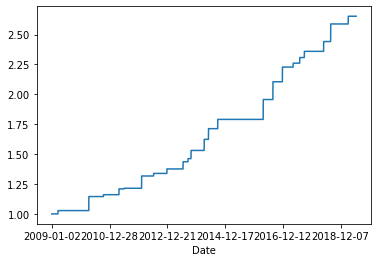

In [17]:
import matplotlib.pylab as plt
book['acc return'].plot()

In [18]:
book.tail()

,Adj Close,trade,return,acc return
Date,,,,
2019-06-18,290.984741,buy,1.0,2.652793
2019-06-19,291.641541,buy,1.0,2.652793
2019-06-20,294.427979,buy,1.0,2.652793
2019-06-21,294.000000,buy,1.0,2.652793
2019-06-24,293.640015,buy,1.0,2.652793
